<a href="https://colab.research.google.com/github/hadilbelhadjhassin/gomycode/blob/main/Checkpoint8_Let's_discover_the_inherent_clusters_K_means_%26_Hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CUST_ID:** Identification of Credit Cardholder (Categorical).

**BALANCE:** Balance amount left in their account to make purchases

**BALANCE_FREQUENCY:** How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).

**PURCHASES:** Amount of purchases made from the account.

**ONEOFF_PURCHASES:** Maximum purchase amount done in one go.

**INSTALLMENTS_PURCHASES:** Amount of purchase done in installment.

**CASH_ADVANCE:** Cash in advance given by the user.

**PURCHASES_FREQUENCY:** How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).

**ONEOFFPURCHASESFREQUENCY:** How frequently Purchases are happening in one go (1 = frequently purchased, 0 = not frequently purchased).

**PURCHASESINSTALLMENTSFREQUENCY:** How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).

**CASHADVANCEFREQUENCY:** How frequently the cash in advance is being paid.

**CASHADVANCETRX:** Number of Transactions made with "Cash in Advanced".

**PURCHASES_TRX:** Number of purchase transactions made.

**CREDIT_LIMIT:** Limit of Credit Card for user.

**PAYMENTS:** Amount of Payment done by user.

**MINIMUM_PAYMENTS:** Minimum amount of payments made by user.

**PRCFULLPAYMENT:** Percent of full payment paid by user.

**TENURE:** Tenure of credit card service for user.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# importing data
data = pd.read_csv('/content/CC GENERAL.csv')

In [ ]:
# verification
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
print(f'Shape of the given dataset: {data.shape}')

Shape of the given dataset: (8950, 18)


In [ ]:
print(f'Summary of the data: \n{data.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
print(f'Null values in given dataset: \n{data.isnull().sum()}')

Null values in given dataset: 
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [ ]:
# preprocessing 
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())
data = data.drop("CUST_ID", axis=1)

In [ ]:
print(f'Data types in the given dataset is: \n{data.dtypes}')

Data types in the given dataset is: 
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


In [ ]:
# convert types from int to float
data["TENURE"] = [float(i) for i in data["TENURE"].values]
data["CASH_ADVANCE_TRX"] = [float(i) for i in data["CASH_ADVANCE_TRX"].values]
data["PURCHASES_TRX"] = [float(i) for i in data["PURCHASES_TRX"].values]

In [ ]:
print(f'Columns in given dataset: \n{data.columns}')

Columns in given dataset: 
Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [ ]:
# verification
data.drop(data.columns[np.isnan(data).any()], axis=1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,0.000000,864.206542,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,325.594462,48.886365,0.500000,6.0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,275.861322,864.206542,0.000000,6.0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,81.270775,82.418369,0.250000,6.0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,52.549959,55.755628,0.250000,6.0


In [ ]:
# rounding values
data = round(data, 2)

In [ ]:
# verification
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0.0,2.0,1000.0,201.80,139.51,0.00,12.0
1,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4.0,0.0,7000.0,4103.03,1072.34,0.22,12.0
2,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0.0,12.0,7500.0,622.07,627.28,0.00,12.0
3,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1.0,1.0,7500.0,0.00,864.21,0.00,12.0
4,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0.0,1.0,1200.0,678.33,244.79,0.00,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.49,1.00,291.12,0.00,291.12,0.00,1.00,0.00,0.83,0.00,0.0,6.0,1000.0,325.59,48.89,0.50,6.0
8946,19.18,1.00,300.00,0.00,300.00,0.00,1.00,0.00,0.83,0.00,0.0,6.0,1000.0,275.86,864.21,0.00,6.0
8947,23.40,0.83,144.40,0.00,144.40,0.00,0.83,0.00,0.67,0.00,0.0,5.0,1000.0,81.27,82.42,0.25,6.0
8948,13.46,0.83,0.00,0.00,0.00,36.56,0.00,0.00,0.00,0.17,2.0,0.0,500.0,52.55,55.76,0.25,6.0


In [ ]:
# normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(data)

In [ ]:
# construction of new dataframe
import numpy as np
import pandas as pd
df=pd.DataFrame(df, columns=data.columns)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731990,-0.242143,-0.424900,-0.356934,-0.349079,-0.466786,-0.797242,-0.677221,-0.715675,-0.673708,-0.476070,-0.511333,-0.960380,-0.528980,-0.310968,-0.524666,0.360680
1,0.786962,0.137354,-0.469552,-0.356934,-0.454576,2.605607,-1.220490,-0.677221,-0.916882,0.574726,0.110074,-0.591796,0.688601,0.818641,0.089310,0.227132,0.360680
2,0.447136,0.516851,-0.107668,0.108889,-0.454576,-0.466786,1.269205,2.672431,-0.916882,-0.673708,-0.476070,-0.109020,0.826016,-0.383804,-0.101665,-0.524666,0.360680
3,0.049099,-1.001138,0.232058,0.546189,-0.454576,-0.368652,-1.021315,-0.409249,-0.916882,-0.274209,-0.329534,-0.551565,0.826016,-0.598688,0.000001,-0.524666,0.360680
4,-0.358777,0.516851,-0.462063,-0.347294,-0.454576,-0.466786,-1.021315,-0.409249,-0.916882,-0.673708,-0.476070,-0.551565,-0.905414,-0.364369,-0.265792,-0.524666,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737952,0.516851,-0.333293,-0.356934,-0.132643,-0.466786,1.269205,-0.677221,1.170639,-0.673708,-0.476070,-0.350408,-0.960380,-0.486218,-0.349853,1.183965,-4.122768
8946,-0.742425,0.516851,-0.329136,-0.356934,-0.122823,-0.466786,1.269205,-0.677221,1.170639,-0.673708,-0.476070,-0.350408,-0.960380,-0.503397,0.000001,-0.524666,-4.122768
8947,-0.740397,-0.199977,-0.401965,-0.356934,-0.294893,-0.466786,0.845957,-0.677221,0.768225,-0.673708,-0.476070,-0.390639,-0.960380,-0.570615,-0.335465,0.329649,-4.122768
8948,-0.745173,-0.199977,-0.469552,-0.356934,-0.454576,-0.449352,-1.220490,-0.677221,-0.916882,0.175227,-0.182998,-0.591796,-1.097795,-0.580536,-0.346905,0.329649,-4.122768


In [ ]:
# verification
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# preprocessing
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [ ]:
# verification
df.drop(df.columns[np.isnan(df).any()], axis=1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731990,-0.242143,-0.424900,-0.356934,-0.349079,-0.466786,-0.797242,-0.677221,-0.715675,-0.673708,-0.476070,-0.511333,-0.960380,-0.528980,-0.310968,-0.524666,0.360680
1,0.786962,0.137354,-0.469552,-0.356934,-0.454576,2.605607,-1.220490,-0.677221,-0.916882,0.574726,0.110074,-0.591796,0.688601,0.818641,0.089310,0.227132,0.360680
2,0.447136,0.516851,-0.107668,0.108889,-0.454576,-0.466786,1.269205,2.672431,-0.916882,-0.673708,-0.476070,-0.109020,0.826016,-0.383804,-0.101665,-0.524666,0.360680
3,0.049099,-1.001138,0.232058,0.546189,-0.454576,-0.368652,-1.021315,-0.409249,-0.916882,-0.274209,-0.329534,-0.551565,0.826016,-0.598688,0.000001,-0.524666,0.360680
4,-0.358777,0.516851,-0.462063,-0.347294,-0.454576,-0.466786,-1.021315,-0.409249,-0.916882,-0.673708,-0.476070,-0.551565,-0.905414,-0.364369,-0.265792,-0.524666,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737952,0.516851,-0.333293,-0.356934,-0.132643,-0.466786,1.269205,-0.677221,1.170639,-0.673708,-0.476070,-0.350408,-0.960380,-0.486218,-0.349853,1.183965,-4.122768
8946,-0.742425,0.516851,-0.329136,-0.356934,-0.122823,-0.466786,1.269205,-0.677221,1.170639,-0.673708,-0.476070,-0.350408,-0.960380,-0.503397,0.000001,-0.524666,-4.122768
8947,-0.740397,-0.199977,-0.401965,-0.356934,-0.294893,-0.466786,0.845957,-0.677221,0.768225,-0.673708,-0.476070,-0.390639,-0.960380,-0.570615,-0.335465,0.329649,-4.122768
8948,-0.745173,-0.199977,-0.469552,-0.356934,-0.454576,-0.449352,-1.220490,-0.677221,-0.916882,0.175227,-0.182998,-0.591796,-1.097795,-0.580536,-0.346905,0.329649,-4.122768


In [ ]:
# rounding values
df = round(df, 2)

In [ ]:
# general description of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

In [ ]:
 # verification
 df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.73,-0.24,-0.42,-0.36,-0.35,-0.47,-0.80,-0.68,-0.72,-0.67,-0.48,-0.51,-0.96,-0.53,-0.31,-0.52,0.36
1,0.79,0.14,-0.47,-0.36,-0.45,2.61,-1.22,-0.68,-0.92,0.57,0.11,-0.59,0.69,0.82,0.09,0.23,0.36
2,0.45,0.52,-0.11,0.11,-0.45,-0.47,1.27,2.67,-0.92,-0.67,-0.48,-0.11,0.83,-0.38,-0.10,-0.52,0.36
3,0.05,-1.00,0.23,0.55,-0.45,-0.37,-1.02,-0.41,-0.92,-0.27,-0.33,-0.55,0.83,-0.60,0.00,-0.52,0.36
4,-0.36,0.52,-0.46,-0.35,-0.45,-0.47,-1.02,-0.41,-0.92,-0.67,-0.48,-0.55,-0.91,-0.36,-0.27,-0.52,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.74,0.52,-0.33,-0.36,-0.13,-0.47,1.27,-0.68,1.17,-0.67,-0.48,-0.35,-0.96,-0.49,-0.35,1.18,-4.12
8946,-0.74,0.52,-0.33,-0.36,-0.12,-0.47,1.27,-0.68,1.17,-0.67,-0.48,-0.35,-0.96,-0.50,0.00,-0.52,-4.12
8947,-0.74,-0.20,-0.40,-0.36,-0.29,-0.47,0.85,-0.68,0.77,-0.67,-0.48,-0.39,-0.96,-0.57,-0.34,0.33,-4.12
8948,-0.75,-0.20,-0.47,-0.36,-0.45,-0.45,-1.22,-0.68,-0.92,0.18,-0.18,-0.59,-1.10,-0.58,-0.35,0.33,-4.12


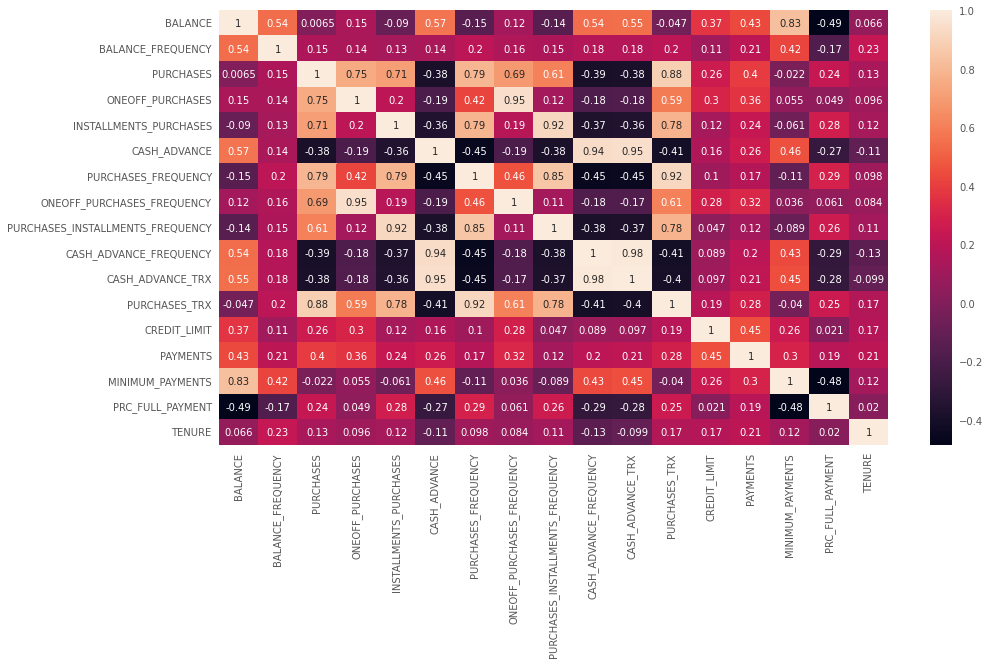

In [ ]:
# visualisation
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(method='spearman'), annot = True, mask=None)
plt.show()

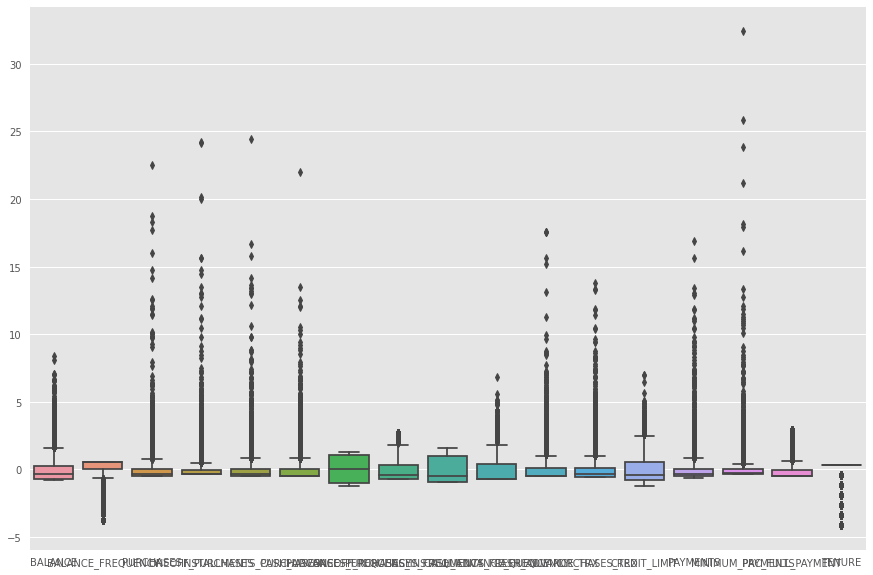

In [ ]:
# visualisation
plt.figure(figsize=(15,10))
sns.boxplot(data = df)
plt.show()

In [ ]:
# use hierarchical clustering to identify the inherent groupings within our data 
from sklearn.cluster import AgglomerativeClustering # importing our Agglomerative clustering algorithm 
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete') # applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric.
labels = model.fit_predict(df) # fitting our data.

In [ ]:
# see our labels
agglomerative=pd.DataFrame(labels)
agglomerative

,0
0,1
1,1
2,1
3,1
4,1
...,...
8945,1
8946,1
8947,1
8948,1


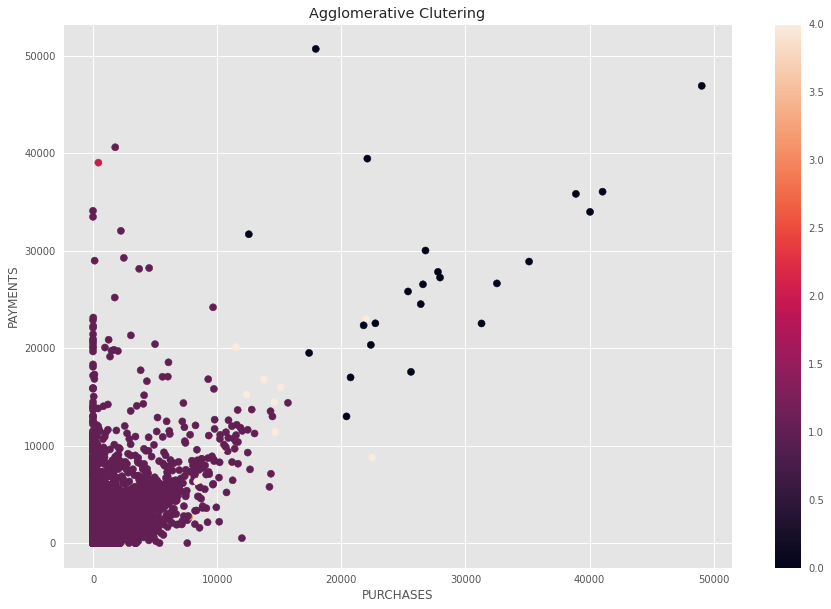

In [ ]:
# plotting the clusters
import matplotlib.pyplot as plt
fig =plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter (data ["PURCHASES"] , data ["PAYMENTS"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("PAYMENTS")
plt.colorbar(scatter)
plt.show()

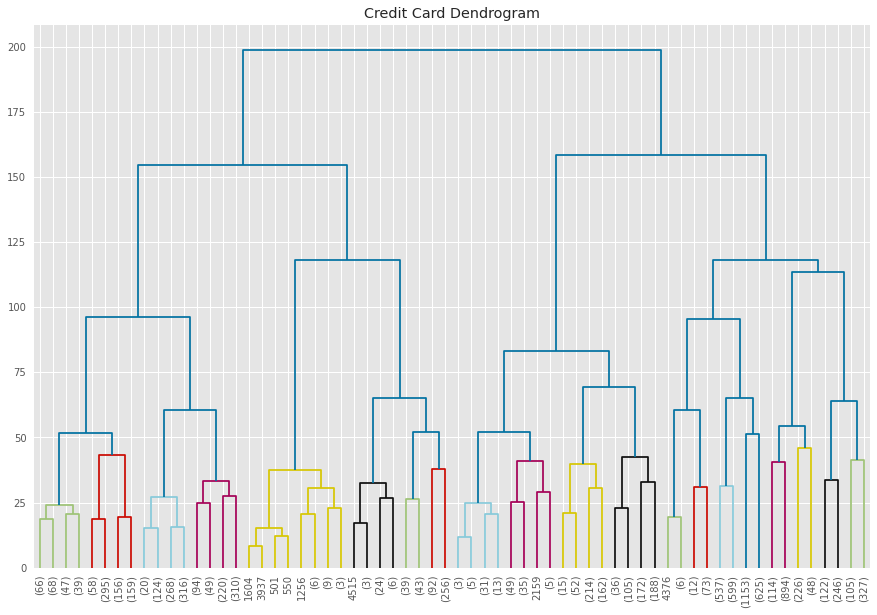

In [ ]:
# Plot the dendrogram
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_df = linkage(df, method="ward")
plt.figure(figsize=(15,10))
dendrogram(linkage_df,leaf_rotation=90,p=5,color_threshold=50,leaf_font_size=10,truncate_mode='level')
plt.title("Credit Card Dendrogram")
plt.show()

In [ ]:
# use k-means clustering
from sklearn.cluster import KMeans  # importing our KMeans clustering algorithm
kmeans=KMeans(n_clusters=3, random_state=0)  # cluster our data by choosing 5 as number of clusters
cluster=kmeans.fit(df) # fitting our data
dfy=kmeans.predict(df)

In [ ]:
# see the labels
labels = kmeans.labels_
labels=pd.DataFrame(labels)
print(labels)

      0
0     0
1     2
2     0
3     0
4     0
...  ..
8945  0
8946  0
8947  0
8948  0
8949  0

[8950 rows x 1 columns]


In [ ]:
# printing the coordinates of cluster centers
centers = kmeans.cluster_centers_
print(centers)   

[[-0.36702131 -0.17693607 -0.23504754 -0.20826066 -0.17388852 -0.31153934
  -0.06712951 -0.2435918  -0.05095738 -0.33097213 -0.30080492 -0.24693279
  -0.33855902 -0.28529836 -0.13255082  0.00684918 -0.0295377 ]
 [ 0.30501989  0.44249801  1.50712013  1.26457438  1.24032617 -0.25230708
   1.14155131  1.56078759  0.94289578 -0.35801909 -0.25595863  1.66282418
   0.87580748  0.81991249  0.15984885  0.50159905  0.29819411]
 [ 1.16478343  0.3428688  -0.28962335 -0.20869429 -0.30133082  1.38264281
  -0.64152542 -0.30714375 -0.55587571  1.56136849  1.34320151 -0.36496547
   0.60211551  0.44517891  0.38130571 -0.40566855 -0.12592593]]


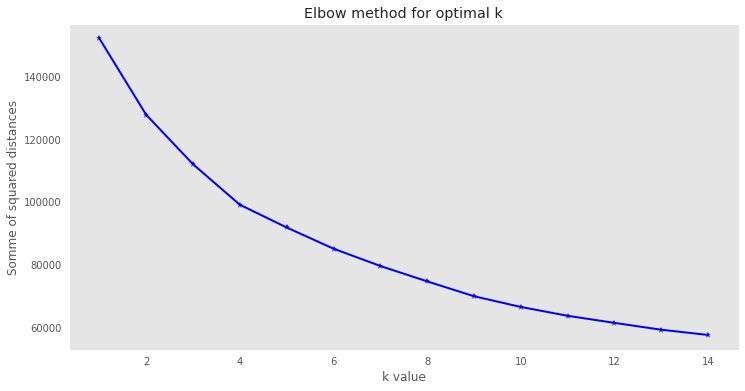

In [ ]:
# try different k values
distances = []
kr=range(1, 15)
for i in kr:
    kmeans = KMeans(n_clusters=i, init = 'k-means++')
    km=kmeans.fit(df)
    distances.append(kmeans.inertia_) # calculating the squared distance of each point from its closest cluster
    
# plotting courbe    
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(kr, distances, linewidth= 2, color = "blue", marker = '*')
plt.style.use('ggplot')
plt.xlabel('k value')
plt.ylabel('Somme of squared distances')
plt.title('Elbow method for optimal k')
plt.show()

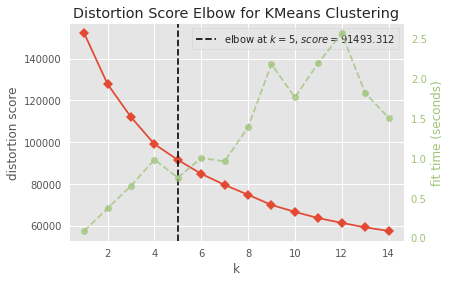

In [ ]:
# the Elbow method
vis_elbow = KElbowVisualizer(kmeans, k = (1, 15)) # instantiate the clustering model and visualizer
vis_elbow.fit(df) # fit the data to the visualizer
vis_elbow.show()

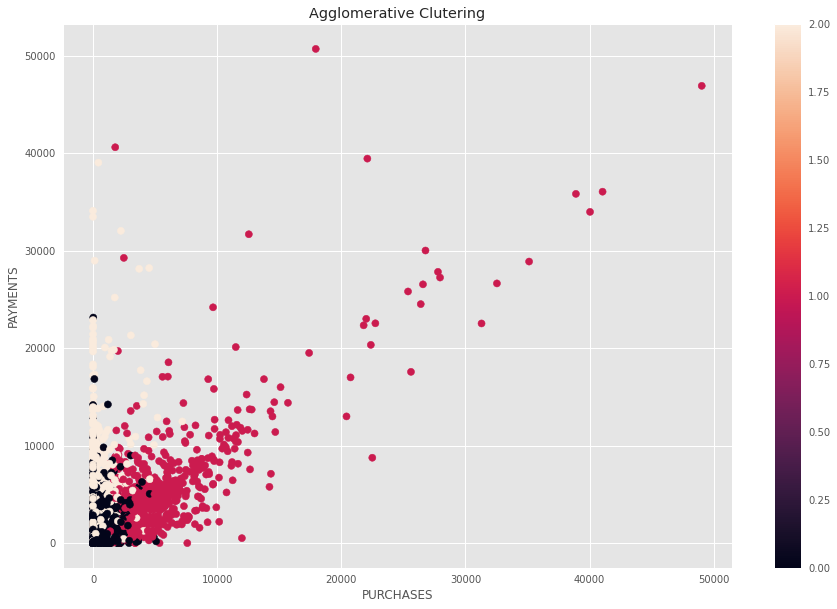

In [ ]:
# plotting the clusters
import matplotlib.pyplot as plt
fig =plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter (data ["PURCHASES"] , data ["PAYMENTS"] , c= labels[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("PAYMENTS")
plt.colorbar(scatter)
plt.show()

Text(0.5, 1.0, 'K_means')

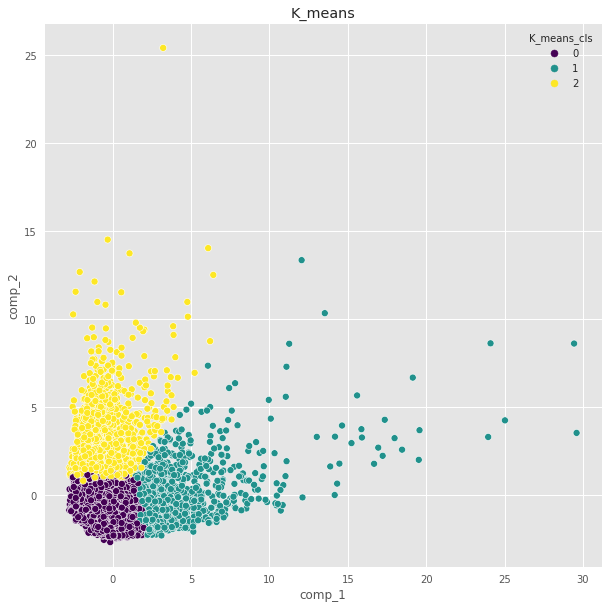

In [ ]:
# dimension reduction method
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df)
pca_dataframe = pd.DataFrame(data = principal_comp,columns = ['comp_1','comp_2'])

pca_dataframe['K_means_cls'] = dfy

plt.figure(figsize=(10,10))
sns.scatterplot(data=pca_dataframe, x='comp_1', y='comp_2', hue='K_means_cls', palette="viridis")
plt.title('K_means')


In [ ]:
# The DBSCAN algorithm 
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, metric ='manhattan')
dbs=dbscan.fit(df)
len(set(dbscan.labels_))

33

In [ ]:
# validation metric
from sklearn import metrics
from sklearn.metrics import pairwise_distances
r1=metrics.silhouette_score(df, agglomerative, metric = 'euclidean')
r2=metrics.silhouette_score(df, labels, metric = 'euclidean')
print("For Agglomerative clustering : " + str(r1))
print("For KMeans clustering : " + str(r2))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



For Agglomerative clustering : 0.7314409413239883
For KMeans clustering : 0.24984235863790424
